In [250]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [251]:
cust_data = pd.read_json("retention.json")

In [252]:
cust_data.head()  ## the data is given in a row wise format and needs to be transposed to column wise to get the attributes of each customer

,0,1,2,3,4,5,6,7,8,9,...,54020,54021,54022,54023,54024,54025,54026,54027,54028,54029
gender,M,M,M,M,M,F,F,M,F,M,...,F,M,F,F,M,M,F,M,F,M
age,21 years,23 years,24 years,24 years,31 years,32 years,43 years,48 years,36 years,26 years,...,66 years,24 years,65 years,46 years,24 years,24 years,46 years,24 years,27 years,20 years
gross_income,$ 79070.91,$ 178270.68,$ 31243.56,$ 130740.54,$ 112975.17,$ 37318.56,$ 131281.5,$ 184641.6,$ 164347.86,$ 27311.31,...,$ 214340.37,$ 68385.87,$ 266600.04,$ 23037.99,$ 75405.6,$ 47237.01,$ 106930.05,$ 185323.05,$ 65246.79,$ 180678.48
segment,Individuals,College_Graduated,College_Graduated,College_Graduated,Individuals,Individuals,Individuals,Individuals,VIP,College_Graduated,...,Individuals,College_Graduated,Individuals,Individuals,College_Graduated,College_Graduated,Individuals,College_Graduated,College_Graduated,College_Graduated
num_credit_cards,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [253]:
cust_df = cust_data.transpose()

In [254]:
cust_df.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21 years,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23 years,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24 years,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24 years,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31 years,$ 112975.17,Individuals,0,I,0,0,0,376


In [255]:
cust_df.info() ##there are no null values in the data but datatype of all columns is object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 54030 non-null  object
 1   age                    54030 non-null  object
 2   gross_income           54030 non-null  object
 3   segment                54030 non-null  object
 4   num_credit_cards       54030 non-null  object
 5   tiprel_1mes            54030 non-null  object
 6   ind_actividad_cliente  54030 non-null  object
 7   num_Products           54030 non-null  object
 8   num_loans              54030 non-null  object
 9   duration               54030 non-null  object
dtypes: object(10)
memory usage: 7.0+ MB


In [256]:
cust_df.dtypes

gender                   object
age                      object
gross_income             object
segment                  object
num_credit_cards         object
tiprel_1mes              object
ind_actividad_cliente    object
num_Products             object
num_loans                object
duration                 object
dtype: object

In [257]:
cust_df.isnull().sum()

gender                   0
age                      0
gross_income             0
segment                  0
num_credit_cards         0
tiprel_1mes              0
ind_actividad_cliente    0
num_Products             0
num_loans                0
duration                 0
dtype: int64

In [258]:
cust_df.describe(include='all')

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
count,54030,54030,54030,54030,54030,54030,54030,54030,54030,54030
unique,2,110,49994,3,2,2,2,14,2,5677
top,F,23 years,$ 451931.22,Individuals,0,I,0,1,0,716
freq,29681,3080,29,32607,51335,29026,28686,27817,53524,226


In [259]:
###age, gross_income, and duration is number type data and needs conversion
## as age is given with years as suffix, it needs to be removed to convert to a number
### $ sign as prefix for gross_income also needs to be fixed
###num_products, num_credit_cards and num_loans are categorical data 

In [260]:
cust_df['age']=list(map(lambda x: x.split(' ')[0],cust_df['age']))

In [261]:
cust_df['gross_income']= list(map(lambda x: x.split('$')[1],cust_df['gross_income']))

In [262]:
cust_df.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.91,Individuals,0,I,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31,112975.17,Individuals,0,I,0,0,0,376


In [263]:
cols = ['age','gross_income','duration']
cust_df[cols] = cust_df[cols].apply(pd.to_numeric)

In [264]:
cust_df.dtypes

gender                    object
age                        int64
gross_income             float64
segment                   object
num_credit_cards          object
tiprel_1mes               object
ind_actividad_cliente     object
num_Products              object
num_loans                 object
duration                   int64
dtype: object

In [265]:
###Now that numeric columns are extracted, we can check for the distribution of all columns
cust_df.describe(include='all')

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
count,54030,54030.000000,5.403000e+04,54030,54030.0,54030,54030.0,54030.0,54030.0,54030.000000
unique,2,NaN,NaN,3,2.0,2,2.0,14.0,2.0,NaN
top,F,NaN,NaN,Individuals,0.0,I,0.0,1.0,0.0,NaN
freq,29681,NaN,NaN,32607,51335.0,29026,28686.0,27817.0,53524.0,NaN
mean,NaN,40.772534,1.341967e+05,NaN,NaN,NaN,NaN,NaN,NaN,2913.936665
std,NaN,17.210781,2.397215e+05,NaN,NaN,NaN,NaN,NaN,NaN,2027.956268
min,NaN,2.000000,2.336010e+03,NaN,NaN,NaN,NaN,NaN,NaN,366.000000
25%,NaN,25.000000,6.858107e+04,NaN,NaN,NaN,NaN,NaN,NaN,1118.000000
50%,NaN,40.000000,1.015663e+05,NaN,NaN,NaN,NaN,NaN,NaN,2039.500000
75%,NaN,51.000000,1.562538e+05,NaN,NaN,NaN,NaN,NaN,NaN,4693.000000


### Univariate Analysis

In [266]:
cust_df['gender'].unique()

array(['M', 'F'], dtype=object)

In [267]:
cust_df['gender'].value_counts()

F    29681
M    24349
Name: gender, dtype: int64

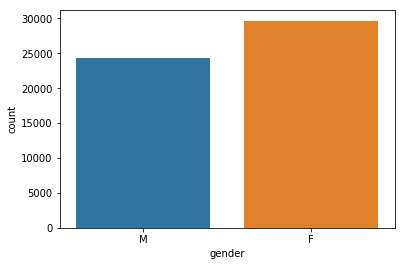

In [268]:
sns.countplot(x=cust_df['gender'])


In [269]:
cust_df['segment'].unique()

array(['Individuals', 'College_Graduated', 'VIP'], dtype=object)

In [270]:
cust_df['segment'].value_counts()  ##very less VIPS and most of the populations is individuals

Individuals          32607
College_Graduated    18963
VIP                   2460
Name: segment, dtype: int64

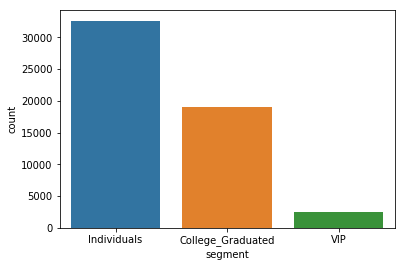

In [271]:
sns.countplot(x=cust_df['segment'])

In [272]:
cust_df['num_Products'].unique() 

array([1, 0, 4, 2, 7, 3, 5, 6, 9, 8, 10, 12, 11, 13], dtype=object)

In [273]:
cust_df['num_Products'].value_counts()  ##maximum of the population have bought less than 5 products with  being the highest
###number of people who bought > 9 products is less than 1 percent

1     27817
0      9573
2      8005
3      3237
4      1907
5      1301
6       955
7       650
8       348
9       156
10       52
11       18
12        9
13        2
Name: num_Products, dtype: int64

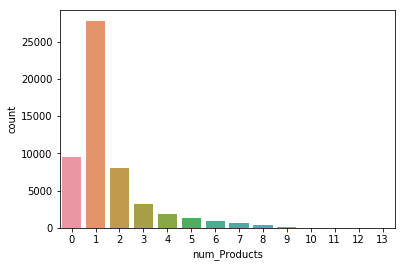

In [274]:
sns.countplot(x=cust_df['num_Products'])

In [275]:
cust_df['num_credit_cards'].unique()

array([0, 1], dtype=object)

In [276]:
cust_df['num_credit_cards'].value_counts()

0    51335
1     2695
Name: num_credit_cards, dtype: int64

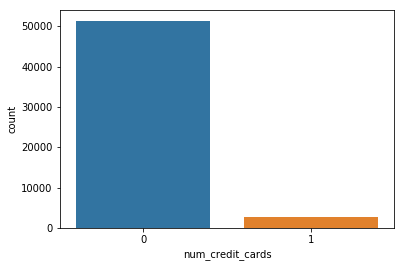

In [277]:
sns.countplot(x=cust_df['num_credit_cards'])

In [278]:
cust_df['num_loans'].unique()

array([0, 1], dtype=object)

In [279]:
cust_df['num_loans'].value_counts()

0    53524
1      506
Name: num_loans, dtype: int64

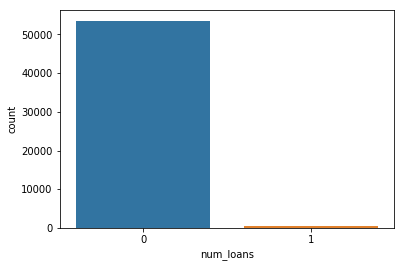

In [280]:
sns.countplot(x=cust_df['num_loans'])

In [281]:
cust_df['tiprel_1mes'].unique()

array(['I', 'A'], dtype=object)

In [282]:
cust_df['tiprel_1mes'].value_counts()  ## 25004 active at the beginning of period

I    29026
A    25004
Name: tiprel_1mes, dtype: int64

Text(0.5,1,'Active vs Inactive - Beginning')

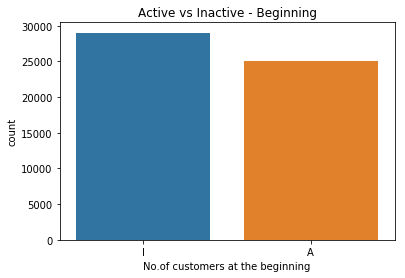

In [283]:
sns.countplot(x=cust_df['tiprel_1mes'])
plt.xlabel("No.of customers at the beginning")
plt.title("Active vs Inactive - Beginning")

In [284]:
cust_df['ind_actividad_cliente'].unique()

array([0, 1], dtype=object)

In [285]:
cust_df['ind_actividad_cliente'].value_counts()   ## 25344 active at the end of the period

0    28686
1    25344
Name: ind_actividad_cliente, dtype: int64

Text(0.5,1,'Active vs Inactive - End')

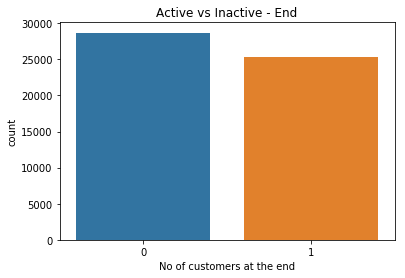

In [286]:
sns.countplot(x=cust_df['ind_actividad_cliente'])
plt.xlabel("No of customers at the end")
plt.title("Active vs Inactive - End")

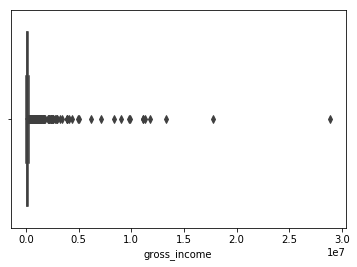

In [287]:
sns.boxplot(x=cust_df['gross_income'])   ##many outliers in the gross_income

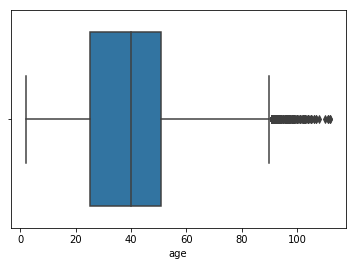

In [288]:
sns.boxplot(x=cust_df['age'])  ##age also has outliers

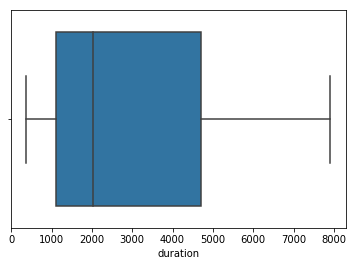

In [289]:
sns.boxplot(x=cust_df['duration'])

### Bivariate Analysis

Text(0.5,1,'Age vs Income')

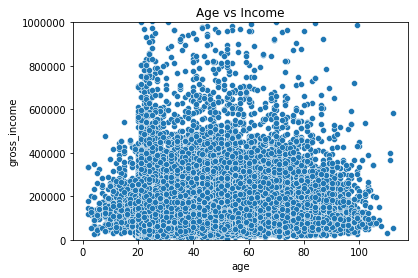

In [290]:
sns.scatterplot(x=cust_df['age'],y=cust_df['gross_income'])  ##Income is high in the age range of 20 to 60 beyond which there is a lowering trend
plt.ylim(1000,1e6)
plt.title('Age vs Income')

Text(0.5,1,'Age vs Duration')

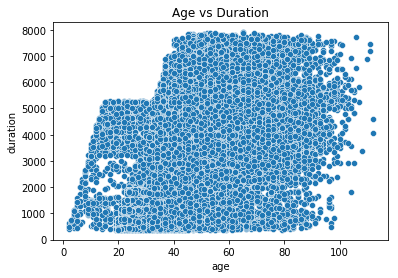

In [291]:
sns.scatterplot(x=cust_df['age'],y=cust_df['duration'])   
plt.title('Age vs Duration')

Text(0.5,1,'Income vs Duration')

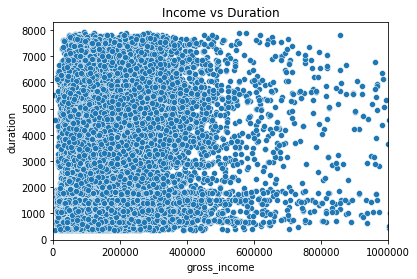

In [292]:
sns.scatterplot(x=cust_df['gross_income'],y=cust_df['duration'])
plt.xlim(1000,1e6)
plt.title('Income vs Duration')

In [293]:
cust_df.corr()   ###no high correlation between any variables

,age,gross_income,duration
age,1.000000,0.068409,0.600794
gross_income,0.068409,1.000000,0.078364
duration,0.600794,0.078364,1.000000


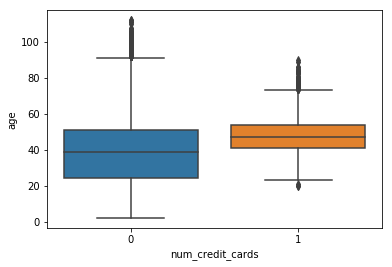

In [294]:
sns.boxplot(x=cust_df['num_credit_cards'],y=cust_df['age'])  ##customers in the age range of 40-50 have availed credit cards

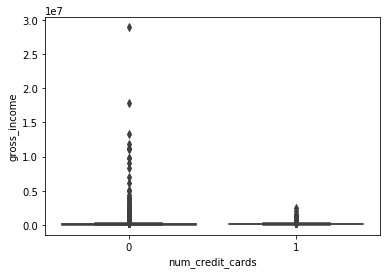

In [295]:
sns.boxplot(x=cust_df['num_credit_cards'],y=cust_df['gross_income'])

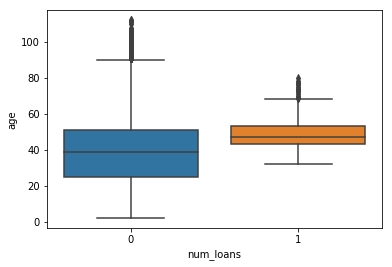

In [296]:
sns.boxplot(x=cust_df['num_loans'],y=cust_df['age'])

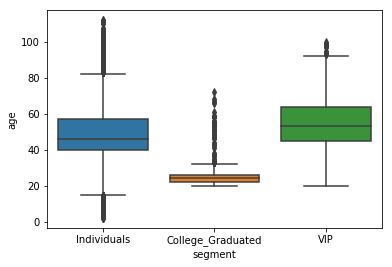

In [297]:
sns.boxplot(x=cust_df['segment'],y=cust_df['age'])

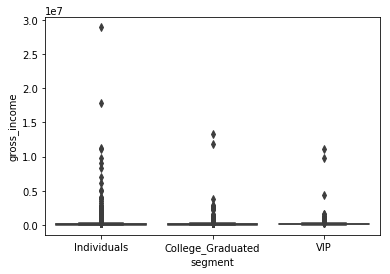

In [298]:
sns.boxplot(x=cust_df['segment'],y=cust_df['gross_income'])

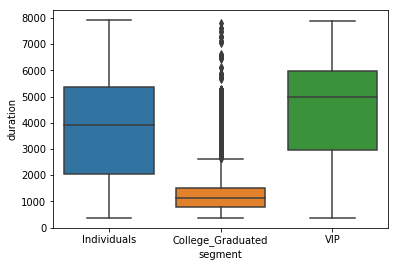

In [299]:
sns.boxplot(x=cust_df['segment'],y=cust_df['duration'])  ##VIPs are having longer duartion with bank followed by individuals

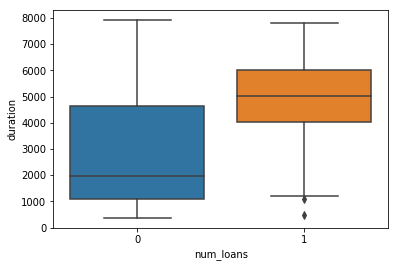

In [300]:
sns.boxplot(x=cust_df['num_loans'],y=cust_df['duration'])  ###customers with loans have higher duration

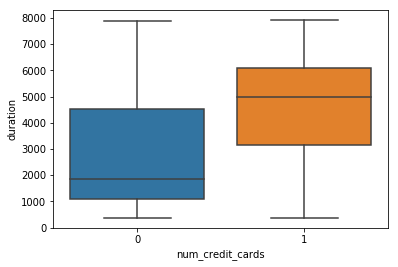

In [301]:
sns.boxplot(x=cust_df['num_credit_cards'],y=cust_df['duration'])

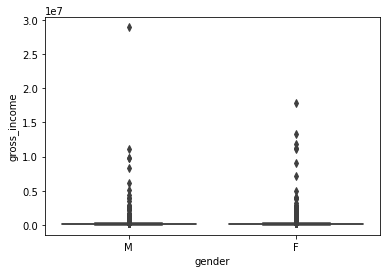

In [302]:
sns.boxplot(x=cust_df['gender'],y=cust_df['gross_income'])

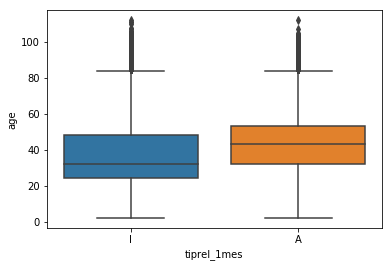

In [303]:
sns.boxplot(x=cust_df['tiprel_1mes'],y=cust_df['age'])

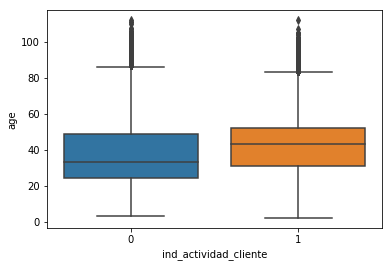

In [304]:
sns.boxplot(x=cust_df['ind_actividad_cliente'],y=cust_df['age'])

In [305]:
pd.crosstab(cust_df['tiprel_1mes'],cust_df['ind_actividad_cliente'])

ind_actividad_cliente,0,1
tiprel_1mes,,
A,2098,22906
I,26588,2438


In [306]:
### Out of 25004 customers who were active at the beginning of the period, 22906 were active till end of study period and 2098 got inactive
### Out of 29026 customers who were inactive at the beginning of the period, 26588 remained inactive while 2438 became active customers
###net 340 customers became active

In [307]:
pd.crosstab(cust_df['gender'],cust_df['tiprel_1mes'])

tiprel_1mes,A,I
gender,,
F,14632,15049
M,10372,13977


In [308]:
pd.crosstab(cust_df['gender'],cust_df['ind_actividad_cliente'])

ind_actividad_cliente,0,1
gender,,
F,15030,14651
M,13656,10693


In [309]:
###male customers have slightly reduced in number by 321 in inactive bucket compared from beginning to end and became active customers
###so 321 out of 340 who became active are male customers and rest are female

### Multivariate Analysis

In [310]:
cust_df.groupby(['tiprel_1mes','num_credit_cards','num_loans','ind_actividad_cliente']).size().unstack()

ind_actividad_cliente                         0        1
tiprel_1mes num_credit_cards num_loans                  
A           0                0           2059.0  19903.0
                             1             25.0    328.0
            1                0             14.0   2522.0
                             1              NaN    153.0
I           0                0          26586.0   2434.0
            1                0              2.0      4.0

In [311]:
###Out of 2438 customers who became active from inactive, 4 availed a credit card and 2434 bought other products
###out of 2098 customers who became inactive from active, 25 are loan holders and 14 are credit card holders and the rest belong to
###other products portfolio

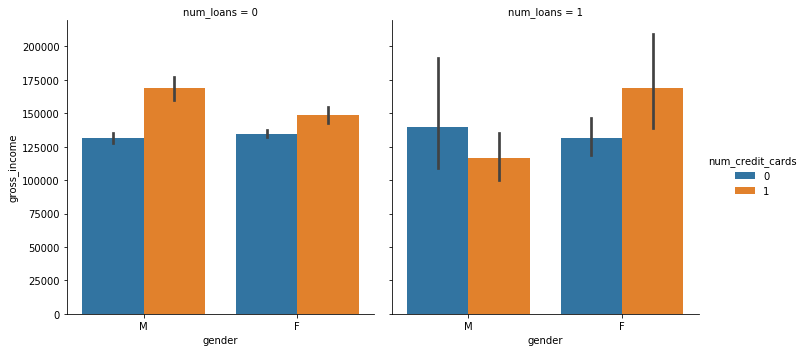

In [312]:
sns.catplot(x='gender',y='gross_income',hue ='num_credit_cards',col='num_loans',data = cust_df,kind="bar")

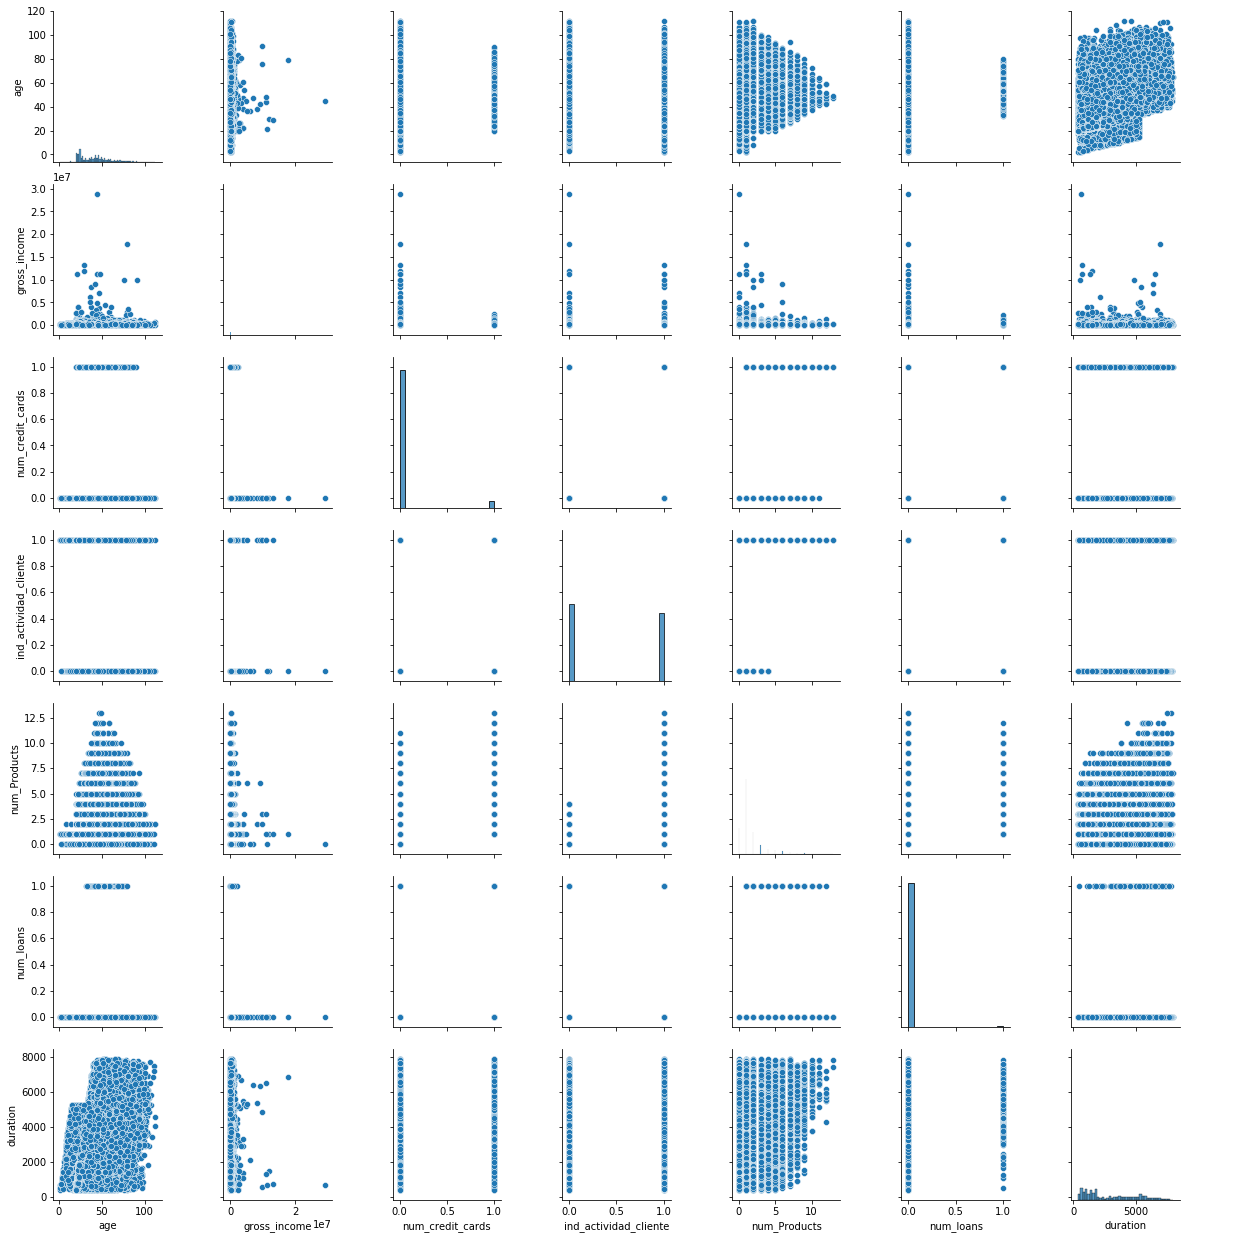

In [313]:
sns.pairplot(cust_df)

### outlier treatment

In [314]:
numerics = ['int64', 'float64']   ## filtering numeric columsn to treat outliers
cust_num = cust_df.select_dtypes(include = numerics)

In [315]:
cust_num.dtypes

age               int64
gross_income    float64
duration          int64
dtype: object

In [316]:
###finding the upper limit and lower limit 
q1 =cust_num.quantile(0.25)
q3 =cust_num.quantile(0.75)
iqr = q3-q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

In [328]:
##capping outliers
for col in cust_num.columns:
    cust_num[col] = np.where(cust_num[col] > upper_limit[col],upper_limit[col],np.where(cust_num[col] < lower_limit[col],
                                    lower_limit[col],cust_num[col]))

In [331]:
###now continuous variables are treated for outliers, the data can be analysed for relations between fields

In [333]:
cust_nonnum = cust_df.select_dtypes(include =['object'])

In [335]:
cust_nonnum.columns

Index(['gender', 'segment', 'num_credit_cards', 'tiprel_1mes',
       'ind_actividad_cliente', 'num_Products', 'num_loans'],
      dtype='object')

In [336]:
df= pd.concat([cust_num.reset_index(drop=True),cust_nonnum.reset_index(drop=True)],axis=1)

In [337]:
df.shape

(54030, 10)

In [338]:
df.head()

,age,gross_income,duration,gender,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans
0,21.0,79070.91,1035.0,M,Individuals,0,I,0,1,0
1,23.0,178270.68,1097.0,M,College_Graduated,0,I,0,1,0
2,24.0,31243.56,1866.0,M,College_Graduated,0,I,1,1,0
3,24.0,130740.54,1440.0,M,College_Graduated,0,I,0,1,0
4,31.0,112975.17,376.0,M,Individuals,0,I,0,0,0


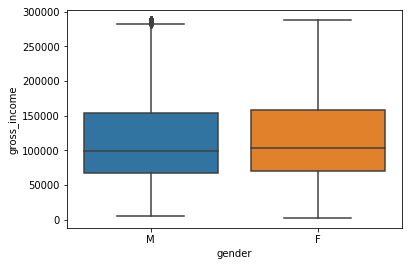

In [339]:
sns.boxplot(x=df['gender'],y=df['gross_income'])

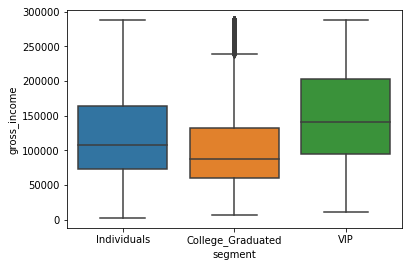

In [341]:
sns.boxplot(x=df['segment'],y=df['gross_income'])

#### For people who were inactive at the start of the study and were active by the time the study ended, is there a pattern in terms of age and gender?

In [368]:
##filtering data For people who were inactive at the start of the study and were active by the time the study ended
df_1 = df[(df['tiprel_1mes']=='I') & (df['ind_actividad_cliente']==1)]

In [369]:
df_1['gender'].value_counts()  ##slightly higher number of females were inactive at start and were active by end

F    1294
M    1144
Name: gender, dtype: int64

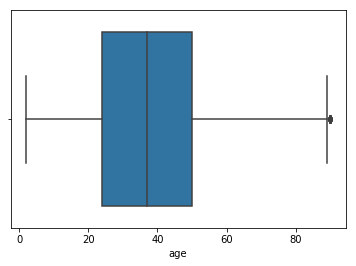

In [370]:
sns.boxplot(df_1['age']) ##customers in the age range of 25-50 were inactive at start and were active by end 

#### Do people with more than average annual income tend to have relatively high activity rates compared to people with less than average annual income?

In [371]:
df_high = df[(df['gross_income'])> (df['gross_income'].mean())]

Text(0.1,1.3,'Activity of High Income Customers')

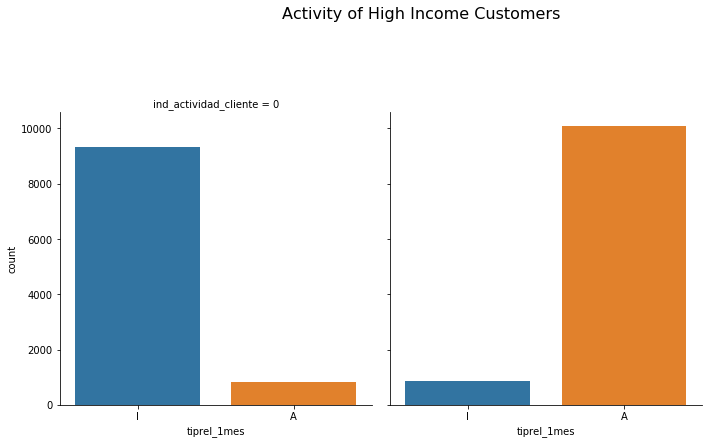

In [388]:
sns.catplot(x='tiprel_1mes',col='ind_actividad_cliente',data =df_high,kind="count")
plt.title('Activity of High Income Customers', x= 0.1,y=1.3, fontsize = 16)

In [374]:
df_low = df[(df['gross_income'])<= (df['gross_income'].mean())]

Text(0.1,1.3,'Activity of low Income Customers')

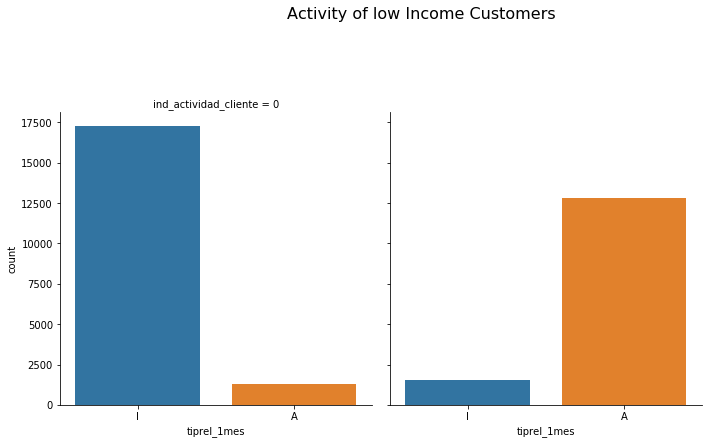

In [389]:
sns.catplot(x='tiprel_1mes',col='ind_actividad_cliente',data =df_low,kind="count")
plt.title('Activity of low Income Customers', x= 0.1,y=1.3, fontsize = 16)

#### Customers with more than average income have shown higher increase in count with their activity levels

#### What is the relationship between the number of products owned by customers who were active at the start and at the end vs those who were active at the start but were inactive at the end of the study period?

In [390]:
df_active = df[(df['tiprel_1mes']=='A') & (df['ind_actividad_cliente']==1)]

In [391]:
df_inactive=df[(df['tiprel_1mes']=='I') & (df['ind_actividad_cliente']==0)]

Text(0.1,1.3,'Number of products owned by Active throughout Customers')

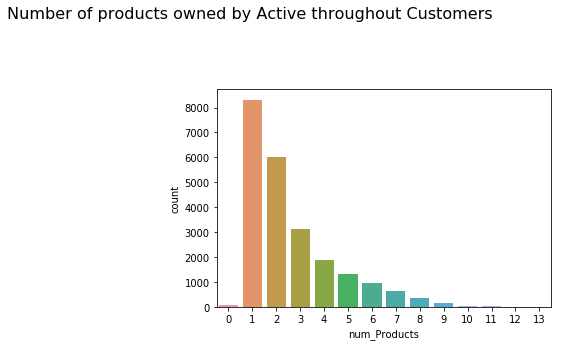

In [392]:
sns.countplot(x='num_Products',data =df_active)
plt.title('Number of products owned by Active throughout Customers', x= 0.1,y=1.3, fontsize = 16)

Text(0.1,1.3,'Number of products owned by Inactive throughout Customers')

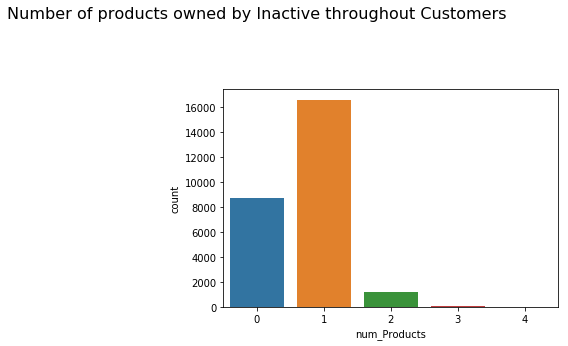

In [393]:
sns.countplot(x='num_Products',data =df_inactive)
plt.title('Number of products owned by Inactive throughout Customers', x= 0.1,y=1.3, fontsize = 16)

#### Most of the customers own product type 1. Active thorughout customers own high number of products compared to that of inactive throughout customers

#### How people who display consistent behaviour (active at start and active at end, inactive at start and inactive at end) differ from people who display a change in their behaviour (active at start but inactive at the end or inactive at start but active at end)

In [395]:
df_change = df[((df['tiprel_1mes']=='A') & (df['ind_actividad_cliente']==0)) | ((df['tiprel_1mes']=='I') & (df['ind_actividad_cliente']==1))]

In [399]:
df_consistent=df[((df['tiprel_1mes']=='A') & (df['ind_actividad_cliente']==1)) | ((df['tiprel_1mes']=='I') & (df['ind_actividad_cliente']==0))]

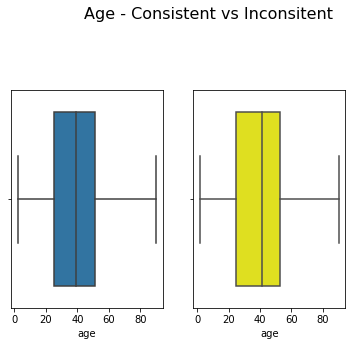

In [403]:
fig, ax =plt.subplots(1,2)
sns.boxplot(df_consistent['age'], ax=ax[0])
sns.boxplot(df_change['age'], ax=ax[1],color='yellow')
plt.title('Age - Consistent vs Inconsitent',x= 0.1,y=1.3, fontsize = 16)
fig.show()


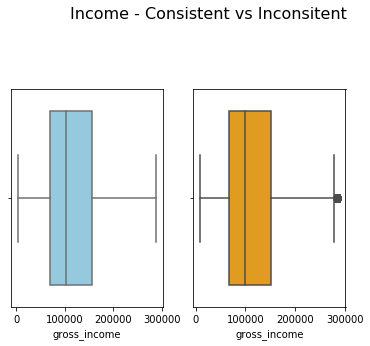

In [404]:
fig, ax =plt.subplots(1,2)
sns.boxplot(df_consistent['gross_income'], ax=ax[0],color='skyblue')
sns.boxplot(df_change['gross_income'], ax=ax[1],color='orange')
plt.title('Income - Consistent vs Inconsitent',x= 0.1,y=1.3, fontsize = 16)
fig.show()

In [405]:
df_consistent.describe()

,age,gross_income,duration
count,49494.000000,49494.000000,49494.000000
mean,40.615327,121183.192101,2905.256960
std,16.970571,69836.750493,2017.987063
min,2.000000,2336.010000,366.000000
25%,25.000000,68712.240000,1131.000000
50%,39.000000,101729.505000,2025.000000
75%,51.000000,156720.052500,4654.000000
max,90.000000,287762.778750,7909.000000


In [406]:
df_change.describe()

,age,gross_income,duration
count,4536.000000,4536.000000,4536.000000
mean,41.981261,119392.510097,3008.644180
std,18.157885,69868.909954,2131.646434
min,2.000000,9049.620000,366.000000
25%,25.000000,67465.807500,1073.000000
50%,41.000000,99893.040000,2310.500000
75%,53.000000,152412.082500,5039.000000
max,90.000000,287762.778750,7879.000000


#### customers with inconsistent behaviour have higher median age compared to that of consistent ones and gross_income is slightlly on lower side

#### Generate elaborate profiles for the following four groups:
##### a. Active at the start but inactive at the end
##### b. Active at the start and active by the end
##### c. Inactive at the start but active at the end
##### d. Inactive at the start and inactive at the end

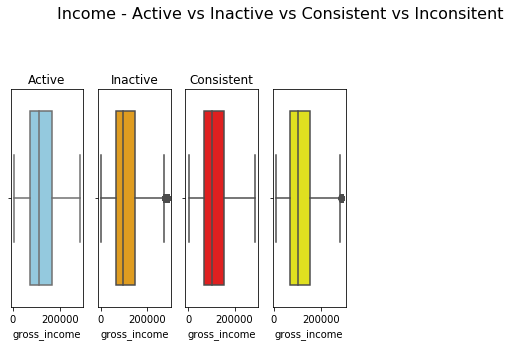

In [413]:
fig, ax =plt.subplots(1,4)
ax1=sns.boxplot(df_active['gross_income'], ax=ax[0],color='skyblue')
ax2=sns.boxplot(df_inactive['gross_income'], ax=ax[1],color='orange')
ax3=sns.boxplot(df_consistent['gross_income'], ax=ax[2],color='red')
ax4=sns.boxplot(df_change['gross_income'], ax=ax[3],color='yellow')
ax1.title.set_text('Active')
ax2.title.set_text('Inactive')
ax3.title.set_text('Consistent')
ax4.title.set_text('Incnsistent')
plt.title('Income - Active vs Inactive vs Consistent vs Inconsitent',x= 0.1,y=1.3, fontsize = 16)
fig.show()

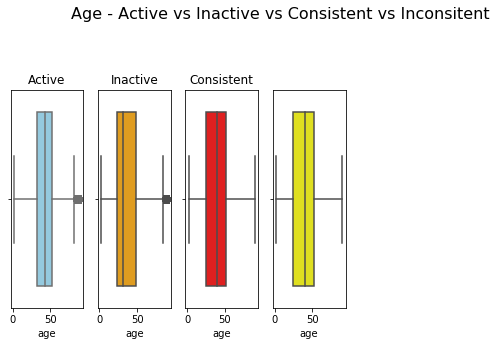

In [415]:
fig, ax =plt.subplots(1,4)
ax1=sns.boxplot(df_active['age'], ax=ax[0],color='skyblue')
ax2=sns.boxplot(df_inactive['age'], ax=ax[1],color='orange')
ax3=sns.boxplot(df_consistent['age'], ax=ax[2],color='red')
ax4=sns.boxplot(df_change['age'], ax=ax[3],color='yellow')
ax1.title.set_text('Active')
ax2.title.set_text('Inactive')
ax3.title.set_text('Consistent')
ax4.title.set_text('Incnsistent')
plt.title('Age - Active vs Inactive vs Consistent vs Inconsitent',x= 0.1,y=1.3, fontsize = 16)
fig.show()

In [ ]:
### Inactive customers have less age and income compared to rest of the categories